## Zoom range changed from 0.2 to 0.8 and the accuracy scores decline a little bit

In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/dataset13'
train_dir = '/home/skhatter/dataset13/train'
valid_dir = '/home/skhatter/dataset13/valid'

train_dam_dir = '/home/skhatter/dataset13/train/damaged'
train_undam_dir = '/home/skhatter/dataset13/train/undamaged'

valid_dam_dir = '/home/skhatter/dataset13/valid/damaged'
valid_undam_dir = '/home/skhatter/dataset13/valid/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 160
Total training undamaged images 234
Total validation damaged images 53
Total validation undamaged images 80


In [4]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3,3), activation ='relu', input_shape = (512, 512, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(200, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 100)     2800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 255, 255, 100)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 253, 253, 200)     180200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 200)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 200)     360200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 200)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 200)       360200    
__________

In [6]:
from keras import optimizers

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.8,
                                  horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(512, 512), batch_size =5,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(valid_dir, target_size = (512, 512),
                                                        batch_size = 5, class_mode='binary')


#displaying the shapes of batch of data and labels
for data_batch, labels_batch in train_generator:
    print('train data batch: ', data_batch.shape)
    print('train label batch: ', labels_batch.shape)
    break
    
for data_batch, labels_batch in validation_generator:
    print('validation data batch: ', data_batch.shape)
    print('validation label batch', labels_batch.shape)
    break

Found 393 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
train data batch:  (5, 512, 512, 3)
train label batch:  (5,)
validation data batch:  (5, 512, 512, 3)
validation label batch (5,)


In [9]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('convnet1.h5')

Epoch 1/30
50/50 [==============================] - 15s - loss: 0.7383 - acc: 0.5680 - val_loss: 0.6972 - val_acc: 0.4000
Epoch 2/30
50/50 [==============================] - 14s - loss: 0.6896 - acc: 0.6079 - val_loss: 0.6839 - val_acc: 0.5410
Epoch 3/30
50/50 [==============================] - 14s - loss: 0.6882 - acc: 0.5800 - val_loss: 0.6838 - val_acc: 0.5410
Epoch 4/30
50/50 [==============================] - 13s - loss: 0.6948 - acc: 0.5693 - val_loss: 0.6845 - val_acc: 0.5902
Epoch 5/30
50/50 [==============================] - 13s - loss: 0.6815 - acc: 0.5427 - val_loss: 0.6885 - val_acc: 0.5984
Epoch 6/30
50/50 [==============================] - 14s - loss: 0.6856 - acc: 0.6000 - val_loss: 0.6819 - val_acc: 0.5902
Epoch 7/30
50/50 [==============================] - 14s - loss: 0.6933 - acc: 0.6013 - val_loss: 0.6603 - val_acc: 0.6230
Epoch 8/30
50/50 [==============================] - 14s - loss: 0.6732 - acc: 0.6187 - val_loss: 0.6688 - val_acc: 0.6066
Epoch 9/30
50/50 [======

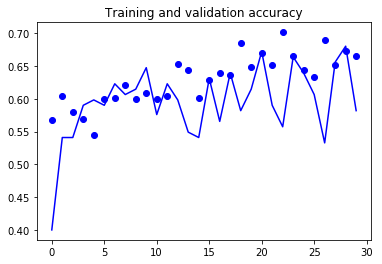

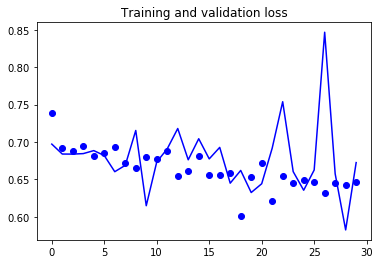

In [10]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [11]:
#Fitting the model using a batch generator

history = model.fit_generator(train_generator, steps_per_epoch=50, epochs = 30, 
                              validation_data= validation_generator, validation_steps=25)


history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv2_2.h5')

Epoch 1/30
50/50 [==============================] - 14s - loss: 0.6897 - acc: 0.6800 - val_loss: 0.7141 - val_acc: 0.5492
Epoch 2/30
50/50 [==============================] - 13s - loss: 0.6056 - acc: 0.6533 - val_loss: 0.7080 - val_acc: 0.6967
Epoch 3/30
50/50 [==============================] - 14s - loss: 0.6416 - acc: 0.6267 - val_loss: 0.6170 - val_acc: 0.6475
Epoch 4/30
50/50 [==============================] - 15s - loss: 0.6113 - acc: 0.6880 - val_loss: 0.6387 - val_acc: 0.6885
Epoch 5/30
50/50 [==============================] - 14s - loss: 0.6652 - acc: 0.6279 - val_loss: 0.5519 - val_acc: 0.7295
Epoch 6/30
50/50 [==============================] - 14s - loss: 0.5614 - acc: 0.7200 - val_loss: 0.6861 - val_acc: 0.6311
Epoch 7/30
50/50 [==============================] - 14s - loss: 0.6157 - acc: 0.6853 - val_loss: 0.6373 - val_acc: 0.6639
Epoch 8/30
50/50 [==============================] - 14s - loss: 0.5788 - acc: 0.7480 - val_loss: 0.5365 - val_acc: 0.7280
Epoch 9/30
50/50 [======

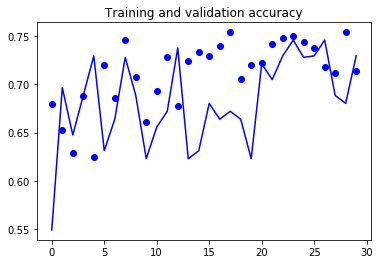

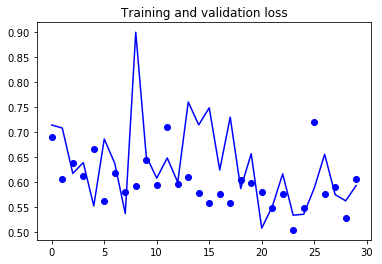

In [12]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()